<a href="https://colab.research.google.com/github/maufonseca18/Challenge_TelecomX_alura/blob/main/Challenge_telecom_x_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import de los datos para el df

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
sns.set(style='whitegrid')	#Estilo limpio del df

In [4]:
df = pd.read_json('/content/drive/MyDrive/Proyecto telecom X Alura /TelecomX_Data.json')

In [5]:
df.shape

(7267, 6)

In [6]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [7]:
df #vista de los datos sin procesar

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [8]:
df = pd.json_normalize(df.to_dict(orient='records'))
df.columns = df.columns.str.replace('.', '_')

print(f"Dimensiones iniciales: {df.shape}")   # filas y columnas
print(f"Columnas disponibles: {list(df.columns)}")  # nombres de columnas
df.head()

Dimensiones iniciales: (7267, 21)
Columnas disponibles: ['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Limpieza y tratamiento de datos

In [9]:
for columna in df.select_dtypes(include='object').columns: #limpieza de texto
    df[columna] = df[columna].astype(str).str.strip().str.title()

columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling', 'Churn'
] #Todo a y\n
mapa_binario = {'Yes': 1, 'No': 0}
for columna in columnas_binarias:
    if columna in df.columns:
        # Tratar casos especiales: "No Internet Service" o "No Phone Service"
        df[columna] = df[columna].replace(['No Internet Service', 'No Phone Service'], 'No')
        # Mapear a 1/0
        df[columna] = df[columna].map(mapa_binario).fillna(0).astype(int)

In [10]:
#Convertir 'account_Charges.Total' a float y manejar valores no numéricos
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df.loc[(df['customer_tenure'] == 0) & (df['account_Charges_Total'].isna()), 'account_Charges_Total'] = 0
#Si tenure = 0 y total es NaN, asumimos total = 0

print("Valores nulos por columna después de la limpieza:")
print(df.isnull().sum())

print("\nTipos de datos después de la limpieza:")
print(df.dtypes)


Valores nulos por columna después de la limpieza:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

Tipos de datos después de la limpieza:
customerID                    object
Churn                          int64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64
customer_tenure         

In [11]:
#Gasto díario
df['daily_expenses'] = df['account_Charges_Monthly'] / 30
print("Nuevas dimensiones del dataframe:", df.shape)
print("\nPrimeras filas con la nueva columna:")
df.head()

Nuevas dimensiones del dataframe: (7267, 22)

Primeras filas con la nueva columna:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,daily_expenses
0,0002-Orfbo,0,Female,0,1,1,9,1,0,Dsl,...,0,1,1,0,One Year,1,Mailed Check,65.6,593.30,2.186667
1,0003-Mknfe,0,Male,0,0,0,9,1,1,Dsl,...,0,0,0,1,Month-To-Month,0,Mailed Check,59.9,542.40,1.996667
2,0004-Tlhlj,1,Male,0,0,0,4,1,0,Fiber Optic,...,1,0,0,0,Month-To-Month,1,Electronic Check,73.9,280.85,2.463333
3,0011-Igkff,1,Male,1,1,0,13,1,0,Fiber Optic,...,1,0,1,1,Month-To-Month,1,Electronic Check,98.0,1237.85,3.266667
4,0013-Exchz,1,Female,1,1,0,3,1,0,Fiber Optic,...,0,1,1,0,Month-To-Month,1,Mailed Check,83.9,267.40,2.796667


#Análisis Descriptivo

In [12]:
print("=== Resumen general de variables numéricas ===")
print(df.describe()) #Resumen estadístico general

print("\n=== Mediana de variables numéricas ===")
print(df.median(numeric_only=True))#Mediana de las variables numéricas

print("\n=== Distribución de Churn (clientes activos vs evasión) ===")
print(df['Churn'].value_counts(normalize=True) * 100)# Distribución de Churn

print("\n=== Tenure promedio según Churn ===")
print(df.groupby('Churn')['customer_tenure'].mean())#Tenure promedio por estado de Churn

print("\n=== Cardinalidad de columnas categóricas ===")
for columna in df.select_dtypes(include='object').columns:
    print(f"{columna}: {df[columna].nunique()} valores únicos")#Cardinalidad de variables categóricas



=== Resumen general de variables numéricas ===
             Churn  customer_SeniorCitizen  customer_Partner  \
count  7267.000000             7267.000000       7267.000000   
mean      0.257190                0.162653          0.484106   
std       0.437115                0.369074          0.499782   
min       0.000000                0.000000          0.000000   
25%       0.000000                0.000000          0.000000   
50%       0.000000                0.000000          0.000000   
75%       1.000000                0.000000          1.000000   
max       1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7267.000000      7267.000000         7267.000000   
mean              0.300124        32.346498            0.902711   
std               0.458343        24.571773            0.296371   
min               0.000000         0.000000            0.000000   
25%               0.000000         9.0000

/tmp/ipython-input-4083038228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


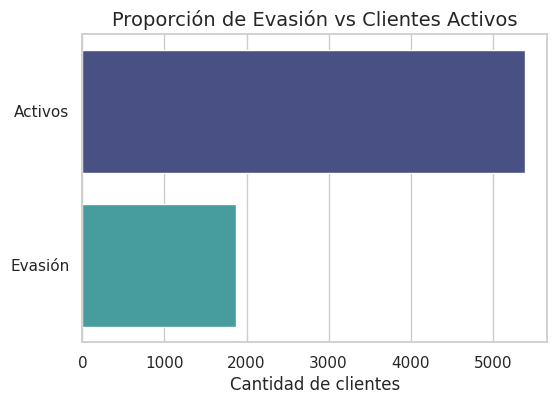

In [13]:
conteo_churn = df['Churn'].value_counts()

#Gráfico de barra(H)
plt.figure(figsize=(6,4))
sns.barplot(
    x=conteo_churn.values,
    y=['Activos', 'Evasión'],
    palette='mako'
)
plt.title('Proporción de Evasión vs Clientes Activos', fontsize=14)
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.show()

In [14]:
churn_tenure = df.groupby('customer_tenure')['Churn'].mean().reset_index()
#Gráfico interactivo
fig = px.line(
    churn_tenure,
    x='customer_tenure',
    y='Churn',
    markers=True,
    title='Tasa de Churn según Tenencia (Meses)',
    line_shape='spline'
)
fig.update_traces(line=dict(width=2))
fig.show()

In [15]:
#Histograma por género
fig = px.histogram(
    df,
    x='customer_gender',
    color='Churn',
    barmode='group',
    title='Evasión por Género',
    labels={'customer_gender': 'Género del cliente', 'Churn': 'Estado'},
    color_discrete_sequence=['#2ca02c', '#d62728']  # Verde / Rojo
)
fig.update_layout(
    xaxis_title='Género',
    yaxis_title='Cantidad de Clientes',
    legend_title='Estado del cliente'
)
fig.show()

In [16]:
#Evasión por Tipo de Contrato
fig = px.histogram(
    df,
    x='account_Contract',
    color='Churn',
    barmode='group',
    title='Evasión por Tipo de Contrato',
    color_discrete_sequence=['#2ca02c', '#d62728']
)
fig.update_layout(
    xaxis_title='Tipo de contrato',
    yaxis_title='Cantidad de Clientes',
    legend_title='Estado'
)
fig.show()

In [18]:
#Evasión por tipo de servicio de internet
fig = px.histogram(
    df,
    x='internet_InternetService',
    color='Churn',
    barmode='group',
    title='Evasión por Tipo de Servicio de Internet',
    color_discrete_sequence=['#2ca02c', '#d62728']
)
fig.update_layout(
    xaxis_title='Tipo de internet',
    yaxis_title='Cantidad de Clientes',
    legend_title='Estado'
)
fig.show()

In [19]:
#Evasión según uso de Streaming TV
fig = px.histogram(
    df,
    x='internet_StreamingTV',
    color='Churn',
    barmode='group',
    title='Evasión según uso de Streaming TV',
    color_discrete_sequence=['#2ca02c', '#d62728']
)
fig.update_layout(
    xaxis_title='Streaming TV',
    yaxis_title='Cantidad de Clientes',
    legend_title='Estado'
)
fig.show()

# Conclusiones – Análisis de Evasión de Clientes (Churn)

El análisis realizado sobre los datos de la empresa **Telecom X** permitió identificar patrones claros que influyen en la **tasa de evasión de clientes**. A partir de la limpieza, transformación y exploración del dataset, se destacan los siguientes hallazgos:

---

## 1. Contratos y permanencia
- Los clientes con **contratos mensuales** presentan una proporción de evasión significativamente mayor en comparación con quienes cuentan con contratos anuales o bianuales.  
- Esta tendencia sugiere que los compromisos a corto plazo facilitan la cancelación del servicio, mientras que contratos de mayor duración fomentan la retención.  
- Además, la variable **tenure (meses de permanencia)** evidencia que la evasión es mucho más frecuente en los primeros meses y disminuye progresivamente conforme aumenta el tiempo del cliente en la compañía.

---

## 2. Tipo de servicio de internet
- Los usuarios que cuentan con **fibra óptica** presentan la tasa de cancelación más alta, seguidos por los clientes con DSL.  
- Los clientes que no tienen servicio de internet muestran una evasión considerablemente menor.  
- Este comportamiento podría deberse a que el servicio de fibra óptica, aunque más rápido, también puede estar más asociado a expectativas elevadas y mayor competencia en el mercado.

---

## 3. Variables demográficas
- El análisis por **género** muestra que hombres y mujeres tienen tasas de evasión muy similares; por lo tanto, el género no es un factor determinante en la cancelación del servicio.  
- Sin embargo, la variable **SeniorCitizen** (mayores de 65 años) muestra una ligera inclinación hacia una mayor evasión, lo que podría estar vinculado a diferentes patrones de consumo o necesidades del servicio.

---

## 4. Servicios adicionales y método de pago
- Los clientes que cuentan con **servicios de streaming (TV y películas)** presentan tasas de evasión más elevadas, posiblemente relacionadas con el costo adicional o la percepción de valor del servicio.  
- Asimismo, se observa que quienes utilizan **métodos de pago electrónicos** (especialmente Electronic Check) tienden a cancelar con mayor frecuencia en comparación con pagos automáticos por transferencia bancaria o tarjeta de crédito.

---

## 5. Cargos mensuales y totales
- El monto de **cargos mensuales** no parece ser, por sí solo, un factor determinante en la evasión: se observan clientes que cancelan en rangos bajos y altos de tarifas.  
- Sin embargo, los **cargos totales acumulados** sí muestran una relación con la permanencia: quienes acumulan mayores pagos suelen tener mayor antigüedad y menor tasa de evasión.

---

## Conclusión general
La tasa de evasión en Telecom X está fuertemente relacionada con **la duración del contrato, el tipo de servicio contratado y la antigüedad del cliente**. El género, en cambio, no presenta impacto significativo, mientras que los métodos de pago y los servicios adicionales sí aportan matices interesantes al comportamiento de cancelación.

Estos hallazgos sugieren que las estrategias de retención deberían enfocarse en:  
- **Promover contratos de mayor plazo** para disminuir cancelaciones tempranas.  
- **Revisar la experiencia de los usuarios de fibra óptica y servicios de streaming** para mejorar su percepción de valor.  
- **Ofrecer incentivos** a clientes nuevos en los primeros meses para fomentar su permanencia.
